## **Import libaries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## **RegressionClass**

In [2]:
class RegressionAlgorithm:
  def __init__(self, 
               C: float=1.0,
               lr: float=1e-3,
               num_steps: int=50,
               minimum: str='SGD'):
    self.C = C
    self.lr = lr
    self.num_steps = num_steps
    self.minimum = minimum
    self.weights = None
 
  def weights_initialisation(self, nomber_of_weights):
    weights = []
    for weight in range(nomber_of_weights):
      weights.append(random.uniform(0.01,1))
    return np.array(weights)

  def l2_regularisation_function(self, weights):
    return self.C*np.sqrt(np.sum(weights**2))


  def gradient_step(self,values,targets, weights, delta_w = 0.001):
    range_weights = len(weights)
    derivation_values = []
    xw = values@weights.T
    for weight in range(range_weights):
      new_weights = weights.T.copy()
      new_weights[weight] += delta_w
      x_nw = values@new_weights
      new_derivation = (np.sum((xw)**2) - 2*np.sum(xw.T@targets) - np.sum((x_nw)**2) + 2*np.sum(x_nw.T@targets))/delta_w
      derivation_values.append(new_derivation)
    return np.array(derivation_values)

  def SGD_step(self,values,targets, weights,nweight, delta_w = 0.001):
    derivation_values = []
    xw = values@weights.T
    new_weights = weights.copy()
    new_weights[nweight] += delta_w
    x_nw = values@new_weights
    new_derivation = (np.sum((xw)**2) - 2*np.sum(xw.T@targets) - np.sum((x_nw)**2) + 2*np.sum(x_nw.T@targets) + self.l2_regularisation_function(weights) - self.l2_regularisation_function(new_weights))/delta_w 
    return np.array(new_derivation)

  def fit(self, values, target_values):
    self.weights = self.weights_initialisation(values.shape[1] + 1)
    print('Start weights', self.weights)
    ones = np.ones(values.shape[0]).reshape((values.shape[0], 1))
    values = np.concatenate([ones, values], axis = 1)
    if self.minimum == 'SGD':
      for step in range(self.num_steps):
        nweight = random.randint(0,len(self.weights)-1)
        self.weights[nweight] += self.lr*self.SGD_step(values, target_values,self.weights,nweight)

    elif self.minimum == 'gradient':
      for step in range(self.num_steps):
        self.weights += self.lr*self.gradient_step(values, target_values,self.weights)
      
    else:
      print('Choose "SGD" or "gradient" for "minimum" variable')
    print('End weights:' , self.weights)



## **Simple test**

*Generate data*

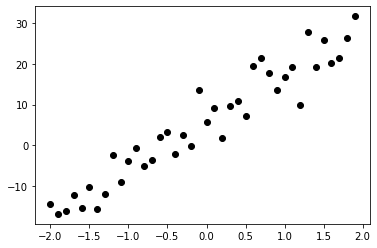

In [3]:
x = np.arange(-2, 2, 0.1)
trash = np.random.normal(0,4, size = len(x))
y = 6 + 12*x + trash

plt.plot(x, y,'ko')

**Test**

In [4]:
x = x.reshape(40,1)

In [5]:
%%time
model = RegressionAlgorithm(minimum = 'SGD')
model.fit(x, y)


Start weights [0.55281193 0.58318233]
End weights: [ 5.18119491 10.79323578]
CPU times: user 6.17 ms, sys: 2.35 ms, total: 8.52 ms
Wall time: 13.3 ms


In [6]:
%%time
model = RegressionAlgorithm(minimum = 'gradient')
model.fit(x, y)


Start weights [0.11815899 0.60085846]
End weights: [ 5.89577769 11.38867873]
CPU times: user 8.73 ms, sys: 2.12 ms, total: 10.8 ms
Wall time: 11.8 ms


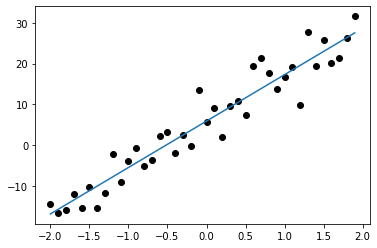

In [7]:
plt.plot(x, y,'ko')

y2 = model.weights[0] + model.weights[1]*x 

plt.plot(x, y2)